# Seminar Project: Subsetting Speeches
---------------
``` 

Jakob Amann
Elias Gabriel Heppner, 1244414
Andri Rutschmann

### Loading Packages


In [53]:
import numpy as np 
import pandas as pd 
import time
import pickle
import time
import os
import datetime
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# probably wise to switch to tiktoken as tokenizer as this is the one recommended by OpenAI 
import nltk
nltk.download('punkt')  # Nur notwendig beim ersten Mal
from nltk.tokenize import word_tokenize # import tokenizer to estimate token count of a speech


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jakob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Load Speeches Data


In [4]:
#Define 
os.chdir("../data/opendiscourse")
os.getcwd()

'c:\\Users\\Jakob\\Documents\\SEDS_Master\\3rd_semester\\SILLM\\SILLM_Project\\Politricks\\data\\opendiscourse'

In [5]:

with open('speeches.pkl', 'rb') as f:
    # Load the object from the file
    speeches_df = pickle.load(f)

with open('politicians.pkl', 'rb') as f:
    # Load the object from the file
    pols_df = pickle.load(f)
    
with open('factions.pkl', 'rb') as f:
    # Load the object from the file
    facts_df = pickle.load(f)
    
with open('electoral_terms.pkl', 'rb') as f:
    # Load the object from the file
    elterms_df = pickle.load(f)
    
with open('contributions_extended.pkl', 'rb') as f:
    # Load the object from the file
   consex_df = pickle.load(f)
    
    

In [6]:
speeches_df = pd.DataFrame(speeches_df)
pols_df = pd.DataFrame(pols_df)
facts_df = pd.DataFrame(facts_df)
elterms_df = pd.DataFrame(elterms_df)   
consex_df = pd.DataFrame(consex_df)

speeches_df

,id,session,electoral_term,politician_id,speech_content,faction_id,document_url,position_short,position_long,date
0,0,2,1,11001150,Meine Damen und Herren! Ich eröffne die 2. Sit...,-1,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Presidium of Parliament,präsident,1949-09-12
1,1,2,1,-1,"Der Bundesrat ist versammelt, Herr Präsident.\n",-1,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Guest,präsident des bundesrats,1949-09-12
2,2,2,1,11001150,Ich danke für diese Erklärung. Ich stelle dami...,-1,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Presidium of Parliament,präsident,1949-09-12
3,3,2,1,-1,"Ja, ich habe den Wunsch.\n",-1,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Guest,bundespräsident,1949-09-12
4,4,2,1,11001150,Ich erteile dem Herrn Bundespräsidenten das Wo...,-1,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Presidium of Parliament,präsident,1949-09-12
...,...,...,...,...,...,...,...,...,...,...
919518,1072832,38,20,11005267,\n\nSehr geehrte Frau Präsidentin! Liebe Kolle...,23,https://dip21.bundestag.de/dip21/btp/20/20038.pdf,Member of Parliament,NA,2022-05-20
919519,1072833,38,20,11003206,\n\nFür die CDU/CSU-Fraktion hat nun der Kolle...,-1,https://dip21.bundestag.de/dip21/btp/20/20038.pdf,Presidium of Parliament,Vizepräsidentin,2022-05-20
919520,1072834,38,20,11004384,\n\nSehr geehrte Frau Präsidentin! Liebe Kolle...,4,https://dip21.bundestag.de/dip21/btp/20/20038.pdf,Member of Parliament,NA,2022-05-20
919521,1072835,38,20,11003206,\n\nDas Wort hat die Kollegin Melanie Wegling ...,-1,https://dip21.bundestag.de/dip21/btp/20/20038.pdf,Presidium of Parliament,Vizepräsidentin,2022-05-20


In [ ]:
pols_df

,id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,aristocracy,academic_title
0,11000001,Manfred,Abelein,Stuttgart,Deutschland,1930-10-20,2008-01-17,männlich,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",NA,Prof. Dr.
1,11000002,Ernst,Achenbach,Siegen,Deutschland,1909-04-09,1991-12-02,männlich,Rechtsanwalt und Notar,NA,Dr.
2,11000003,Annemarie,Ackermann,Parabutsch,Jugoslawien,1913-05-26,1994-02-18,weiblich,Hilfsreferentin,NA,NA
3,11000004,Else,Ackermann,Berlin,Deutschland,1933-11-06,2019-09-14,weiblich,Ärztin,NA,Dr.
4,11000005,Ulrich,Adam,Teterow,Deutschland,1950-06-09,NA,männlich,"Mathematiker, Geschäftsführer",NA,NA
...,...,...,...,...,...,...,...,...,...,...,...
4381,11005305,Bettina,Stark-Watzinger,NA,NA,NA,NA,NA,NA,NA,NA
4382,11005306,Manfred,Stolpe,NA,NA,NA,NA,NA,NA,NA,NA
4383,11005307,Johanna,Wanka,NA,NA,NA,NA,NA,NA,NA,NA
4384,11005308,Ludger,Westrick,NA,NA,NA,NA,NA,NA,NA,NA


In [7]:
facts_df

,id,abbreviation,full_name
0,-1,not found,not found
1,0,AfD,Alternative für Deutschland
2,1,BHE,Block der Heimatvertriebenen und Entrechteten
3,2,BP,Bayernpartei
4,3,Grüne,Bündnis 90/Die Grünen
5,4,CDU/CSU,Christlich Demokratische Union Deutschlands/Ch...
6,5,DA,Demokratische Arbeitsgemeinschaft
7,6,DIE LINKE.,DIE LINKE.
8,7,DP,Deutsche Partei
9,8,DP/DBP,Deutsche Partei/Deutsche Partei Bayern


In [ ]:
elterms_df

,id,start_date,end_date
0,1,-641174400,-512524800
1,2,-512438400,-385516800
2,3,-385430400,-259113600
3,4,-259027200,-132710400
4,5,-132624000,-6393600
5,6,-6307200,92966400
6,7,93052800,219283200
7,8,219369600,342057600
8,9,342144000,417657600
9,10,417744000,540518400


In [ ]:
consex_df

,id,type,first_name,last_name,politician_id,content,speech_id,text_position,faction_id
0,0,Lachen,,,-1,links,6,7,-1
1,1,Personen-Einruf,,hütter,11000979,Nein!,6,2,13
2,2,Zuruf,,,-1,§ 51!,9,3,20
3,3,Zuruf,,,-1,links,11,0,-1
4,4,Personen-Einruf,,blücher,11000202,Jawohl!,12,0,13
...,...,...,...,...,...,...,...,...,...
2546207,2546207,Personen-Einruf,götz,frömming,11004722,Das gibt es gar nicht: gerechte Umverteilung!,1072836,2,0
2546208,2546208,Beifall,,,-1,,1072836,3,23
2546209,2546209,Beifall,,,-1,,1072836,3,13
2546210,2546210,Beifall,,,-1,,1072836,3,3


### Merge and Omit

In [8]:
speeches_df = speeches_df[speeches_df["date"] > datetime.date(2014, 12, 31)]
speeches_df
fin_df = pd.merge(speeches_df, pols_df, left_on='politician_id', right_on='id', how='inner')
fin_df = pd.merge(fin_df, facts_df, left_on='faction_id', right_on='id', how='inner')
fin_df
fin_df = fin_df[["id_x", "session", "electoral_term", "date", "document_url", "speech_content", "politician_id", "first_name", "last_name", "faction_id",  "abbreviation",  "full_name"]]
fin_df
fin_df.to_csv("sub_speeches.csv", index = False)

### Exploration


In [51]:
# print(fin_df.loc[0]['speech_content'])
example_text = fin_df.loc[0]['speech_content']


tokens = word_tokenize(example_text, language='german')
anzahl_tokens = len(tokens)
print(anzahl_tokens)

fin_df['tokenized_speech'] = fin_df['speech_content'].apply(word_tokenize)

# Calculate the average token count
# average_token_count = fin_df['tokenized_speech'].apply(len).mean() 
fin_df['tokenized_speech_len'] = fin_df['tokenized_speech'].apply(len) # runs approx 3 min; 

average_token_count = fin_df['tokenized_speech_len'].mean() # average_token_count == 290.12 Tokens

fin_df['tokenized_speech_len'].describe()

1442


count    109228.000000
mean        290.117406
std         415.610922
min           0.000000
25%          17.000000
50%          50.000000
75%         551.000000
max       11538.000000
Name: tokenized_speech_len, dtype: float64

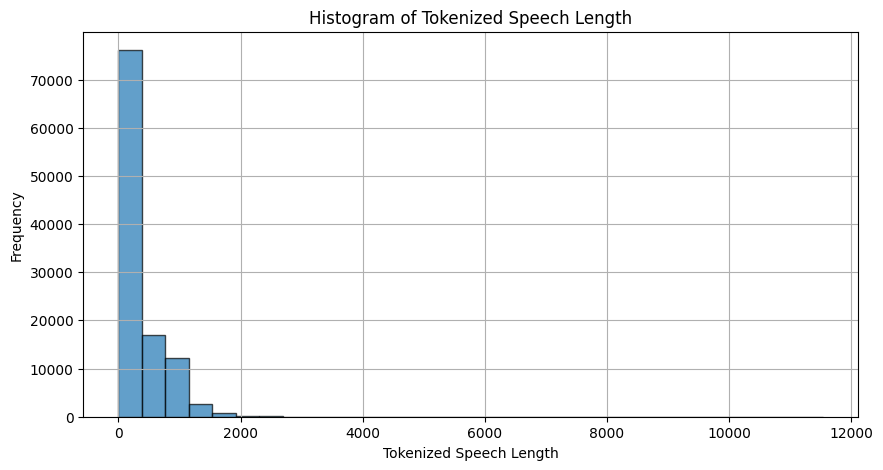

In [54]:
plt.figure(figsize=(10, 5))
plt.hist(fin_df['tokenized_speech_len'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Tokenized Speech Length')
plt.xlabel('Tokenized Speech Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [62]:
# fin_df_filtered = fin_df[fin_df['tokenized_speech'].apply(len) > 250] # I'd argue, that it's wise to focus only on speeces with a relevant length
fin_df_filtered = fin_df[(fin_df['tokenized_speech_len'] > 250) & (fin_df['tokenized_speech_len'] < 2500)]

print(f'{len(fin_df_filtered)} vs. {len(fin_df)} entries when filtering for texts with more than 250 and less than 2500 tokens')

36358 vs. 109228 entries when filtering for texts with more than 250 and less than 2500 tokens


In [60]:
average_token_count = fin_df_filtered['tokenized_speech_len'].mean() # average_token_count =  777.86 Tokens
fin_df_filtered['tokenized_speech_len'].describe()

count    36358.000000
mean       763.435915
std        316.886240
min        251.000000
25%        548.000000
50%        725.000000
75%        919.000000
max       2492.000000
Name: tokenized_speech_len, dtype: float64

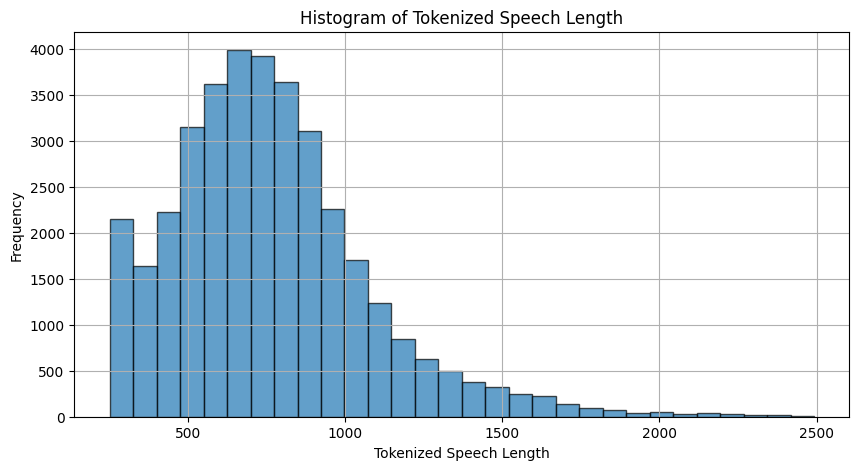

In [61]:
plt.figure(figsize=(10, 5))
plt.hist(fin_df_filtered['tokenized_speech_len'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Tokenized Speech Length')
plt.xlabel('Tokenized Speech Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()